In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Load the full EDC dataset
print("Loading full EDC data...")
edc_full_df = pd.read_csv('edc_full_data.csv')

print(f"Dataset loaded:")
print(f"  Samples: {len(edc_full_df):,}")
print(f"  Duration: {edc_full_df['time_s'].iloc[-1]/60:.2f} minutes")
print(f"  Isd range: [{edc_full_df['Isd'].min():.6f}, {edc_full_df['Isd'].max():.6f}]")
print(f"  Memory: {edc_full_df.memory_usage(deep=True).sum()/1024**2:.0f} MB")

Loading full EDC data...
Dataset loaded:
  Samples: 101,535,470
  Duration: 33.85 minutes
  Isd range: [0.031250, 0.124999]
  Memory: 2324 MB


OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

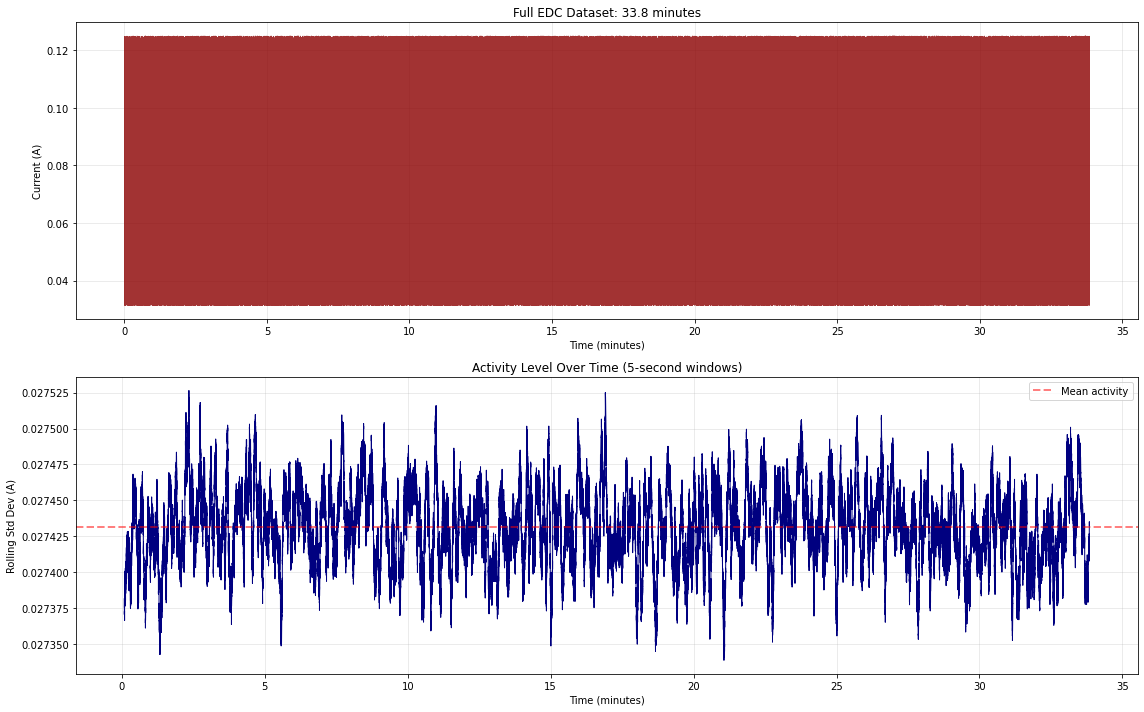

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Full time series (decimated for plotting speed)
decimate_factor = 100  # Plot every 100th point
decimated_time = edc_full_df['time_s'].values[::decimate_factor] / 60
decimated_current = edc_full_df['Isd'].values[::decimate_factor]

axes[0].plot(decimated_time, decimated_current, 
             linewidth=0.5, alpha=0.8, color='darkred')
axes[0].set_xlabel('Time (minutes)')
axes[0].set_ylabel('Current (A)')
axes[0].set_title(f'Full EDC Dataset: {edc_full_df["time_s"].iloc[-1]/60:.1f} minutes')
axes[0].grid(alpha=0.3)

# Activity map - rolling standard deviation
window = 250000  # 5 second window
rolling_std = edc_full_df['Isd'].rolling(window).std()

axes[1].plot(edc_full_df['time_s'].values / 60, rolling_std.values, 
             linewidth=1, color='navy')
axes[1].set_xlabel('Time (minutes)')
axes[1].set_ylabel('Rolling Std Dev (A)')
axes[1].set_title('Activity Level Over Time (5-second windows)')
axes[1].grid(alpha=0.3)
axes[1].axhline(rolling_std.mean(), color='red', linestyle='--', 
                linewidth=2, alpha=0.5, label='Mean activity')
axes[1].legend()

plt.tight_layout()
plt.savefig('edc_full_timeseries.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nActivity statistics:")
print(f"  Mean rolling std: {rolling_std.mean():.6f}")
print(f"  Max rolling std: {rolling_std.max():.6f}")
print(f"  Activity ratio (max/mean): {rolling_std.max()/rolling_std.mean():.2f}x")